# Default scipy optimization

Overview:

1. Start with a specific set of kinematic variables.  
2. Pick random starting points for CFFs
3. Compute TotalUUXS function for each phi in the kinematic set (using current CFFs) to produce Fs
4. Compare resulting Fs to sampled Fs and compute mean-squared error
5. Update CFFs in a direction that reduces that mean-squared error
6. Repeat steps 3-5 until CFFs stop changing

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy.optimize as optimization

from BHDVCStf import BHDVCS #modified bhdvcs file
import utilities as uts

## Setup

In [2]:
bhdvcs = BHDVCS()

df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)

numSets = 15
numReplicas = 500

print(df)

     #Set  index     k       QQ       x_b         t  phi_x         F  \
0       0      0  3.75  1.74013  0.435095 -0.380868      0  0.058205   
1       0      1  3.75  1.74013  0.435095 -0.380868     10  0.055596   
2       0      2  3.75  1.74013  0.435095 -0.380868     20  0.066353   
3       0      3  3.75  1.74013  0.435095 -0.380868     30  0.068655   
4       0      4  3.75  1.74013  0.435095 -0.380868     40  0.072765   
..    ...    ...   ...      ...       ...       ...    ...       ...   
535    14     31  7.75  2.63258  0.345012 -0.361188    310  0.023981   
536    14     32  7.75  2.63258  0.345012 -0.361188    320  0.025345   
537    14     33  7.75  2.63258  0.345012 -0.361188    330  0.024191   
538    14     34  7.75  2.63258  0.345012 -0.361188    340  0.020530   
539    14     35  7.75  2.63258  0.345012 -0.361188    350  0.020891   

         errF        F1       F2      dvcs      ReH      ReE  ReHtilde  
0    0.002910  0.498060  0.68579  0.012288  13.0554 -53.0554  

## Produce Results

In [4]:
def produceResults(data, numSets, numReplicas):
    '''
    :param data: data of class DvcsData (which can be found in utilities.py)
    :param numSets: number of different kinematic sets contained in data
    :param numReplicas: number of replicas you would like to produce
    
    :returns: numpy array with shape (numSets, numReplicas, numCFFs)
    '''
    results = []
    for i in tqdm(range(numSets)):
        replicas = []
        seti = data.getSet(i) # DvcsData object of kinematic set i
        X = np.array(seti.XnoCFF) # the kinematics and all variables necessary to compute 
        sigma = seti.erry # error in F
        pars = np.array([1, 1, 1])
        for i in range(numReplicas):
            y = seti.sampleY()
            cff, cffcov = optimization.curve_fit(bhdvcs.TotalUUXS, X, y, pars, sigma, method='lm')
            replicas.append(cff)
        results.append(replicas)
    return np.array(results)

In [5]:
results = produceResults(data, numSets, numReplicas)

KeyboardInterrupt: 

# ReH

In [21]:
def produceResultsTest(data, numSets, numReplicas):
    '''
    :param data: data of class DvcsData (which can be found in utilities.py)
    :param numSets: number of different kinematic sets contained in data
    :param numReplicas: number of replicas you would like to produce
    
    :returns: numpy array with shape (numSets, numReplicas, numCFFs)
    '''
    results = []
    for i in tqdm(range(numSets)):
        replicas = []
        seti = data.getSet(i) # DvcsData object of kinematic set i
        X = np.array(seti.XnoCFF) # the kinematics and all variables necessary to compute
        print(X)
        sigma = seti.erry # error in F
        print(sigma)
        pars = np.array([1, 1, 1])
        for i in range(numReplicas):
            y = seti.sampleY()
            
produceResultsTest(data, numSets, numReplicas)

[[ 0.00000e+00  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 1.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 2.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 3.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 4.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 5.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 6.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 7.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 8.00000e+01  3.75000e+00  1.74013e+00  4.35095e-01 -3.80868e-01
   4.98060e-01  6.85790e-01  1.22881e-02]
 [ 9.00000e+01  3.7

[[ 0.00000e+00  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 1.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 2.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 3.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 4.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 5.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 6.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 7.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 8.00000e+01  7.75000e+00  1.95072e+00  3.60829e-01 -2.78690e-01
   5.83805e-01  8.57205e-01  1.22881e-02]
 [ 9.00000e+01  7.7

In [9]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 0)

Mean percent error:  9.81117382525892
RMSE:  0.9773713189671708
RMSE w yhat=mean:  2.5254628436780107
R-squared:  0.8502257289946786


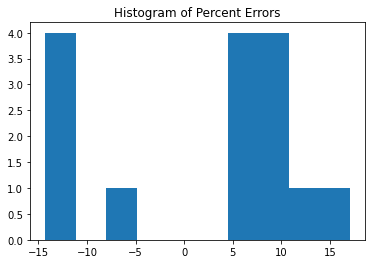

In [10]:
uts.evaluate(y_yhat)

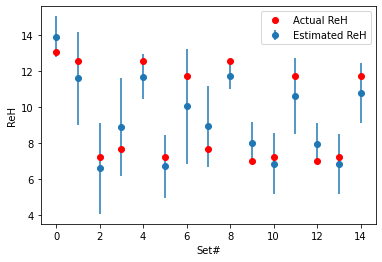

In [11]:
uts.plotError(y_yhat, err, "ReH")

# ReE

Mean percent error:  10.54603882665697
RMSE:  5.4099817610408865
RMSE w yhat=mean:  2.525480507907797
R-squared:  -3.5888468127471507


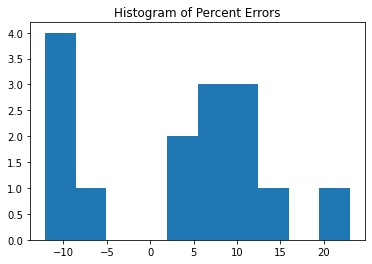

In [12]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 1)
uts.evaluate(y_yhat)

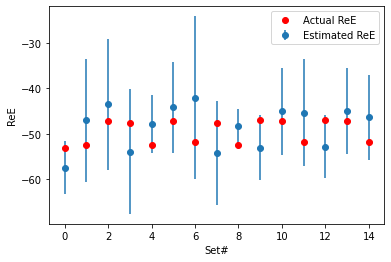

In [13]:
uts.plotError(y_yhat, err, "ReE")

# ReHtilde

Mean percent error:  8.238604345517636
RMSE:  0.4434254531053668
RMSE w yhat=mean:  1.4030345621243816
R-squared:  0.9001140285027577


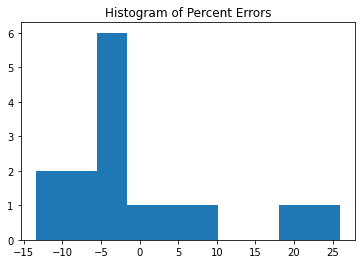

In [14]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 2)
uts.evaluate(y_yhat)

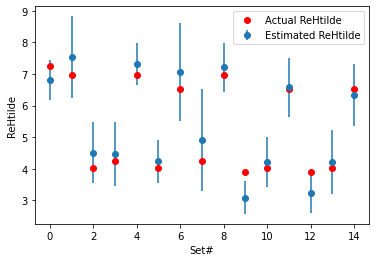

In [15]:
uts.plotError(y_yhat, err, "ReHtilde")

# Propagated Fs at 180

Mean percent error:  5.681032038243001
RMSE:  0.002548938176065456
RMSE w yhat=mean:  0.015855649879790133
R-squared:  0.9741565488456931


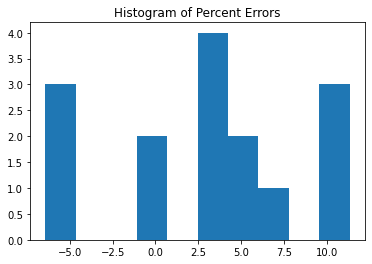

In [16]:
y_yhat, err = uts.y_yhat_errFs(results, data)
uts.evaluate(y_yhat)

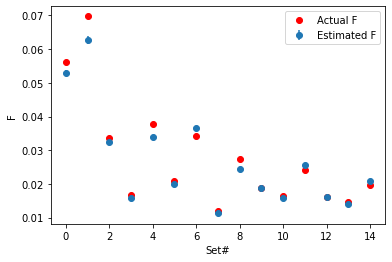

In [17]:
uts.plotError(y_yhat, err, "F")

# Save Results to file for later use

In [18]:
results.tofile('replicas500_Ishara_2.txt')